In [21]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import seaborn as sb

import plotly.graph_objects as go

pd.set_option('display.max_rows', 500)

In [22]:
mpl.rcParams['figure.figsize'] = (25, 15)
pd.set_option('display.max_rows', 500)
sb.set(style='darkgrid')

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Explorative Data Analysis

* visual representation of the data

In [23]:
df_plot = pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot

,date,Germany,India,Singapore,Norway,Netherlands
0,2020-01-22,0,0,0,0,0
1,2020-01-23,0,0,1,0,0
2,2020-01-24,0,0,3,0,0
3,2020-01-25,0,0,3,0,0
4,2020-01-26,0,0,4,0,0
...,...,...,...,...,...,...
866,2022-06-06,26498361,43185049,1321146,1434896,8196517
867,2022-06-07,26583016,43190282,1325623,1435285,8198019
868,2022-06-08,26660652,43197522,1329225,1435512,8200146
869,2022-06-09,26738530,43205106,1332656,1436118,8202575


In [24]:
country_list = ['Germany',
                'India',
                'Singapore',
                'Norway',
                'Netherlands',    
]

<Figure size 1800x1080 with 0 Axes>

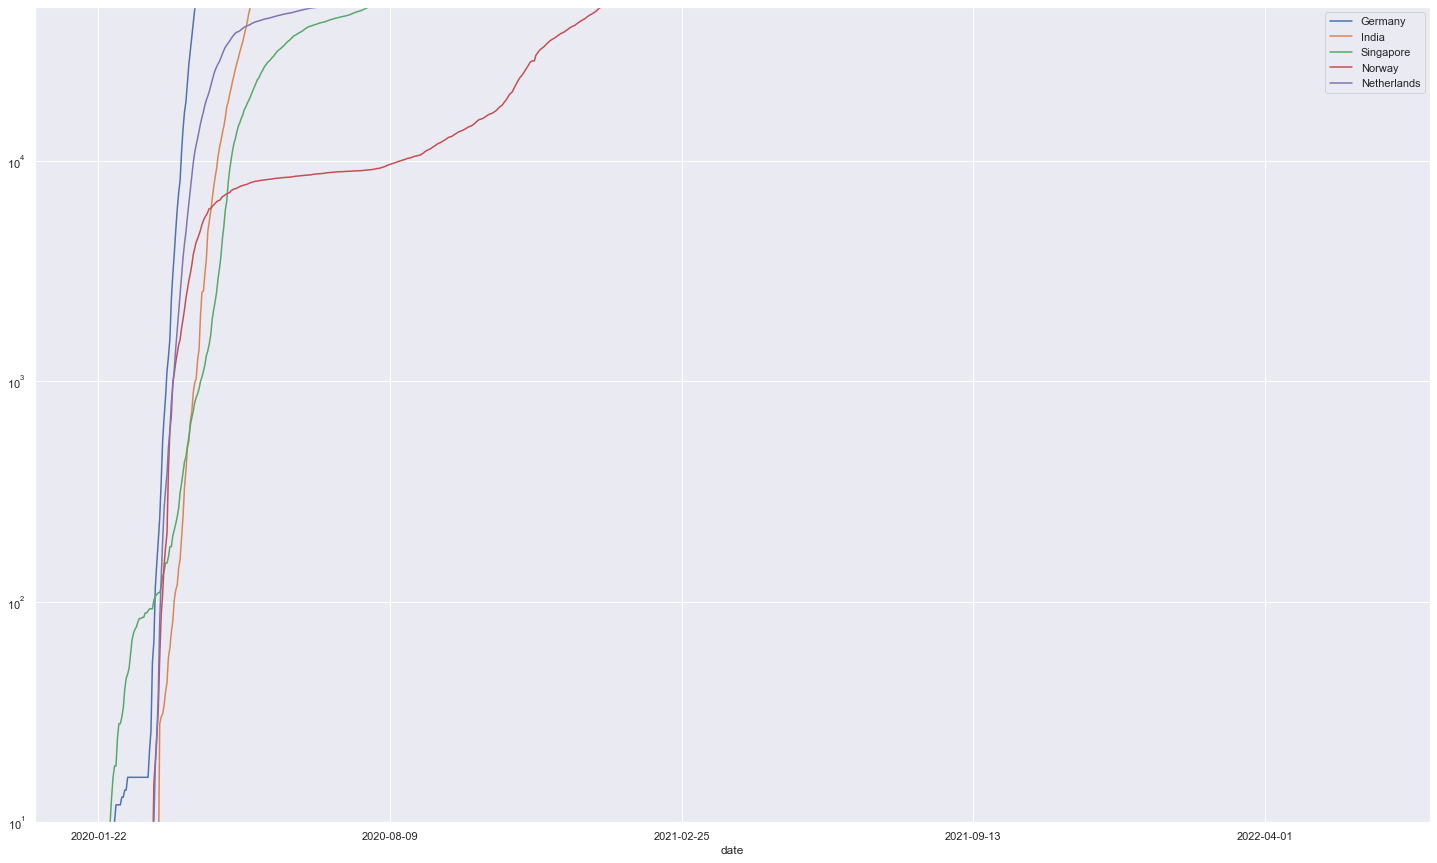

<Figure size 1800x1080 with 0 Axes>

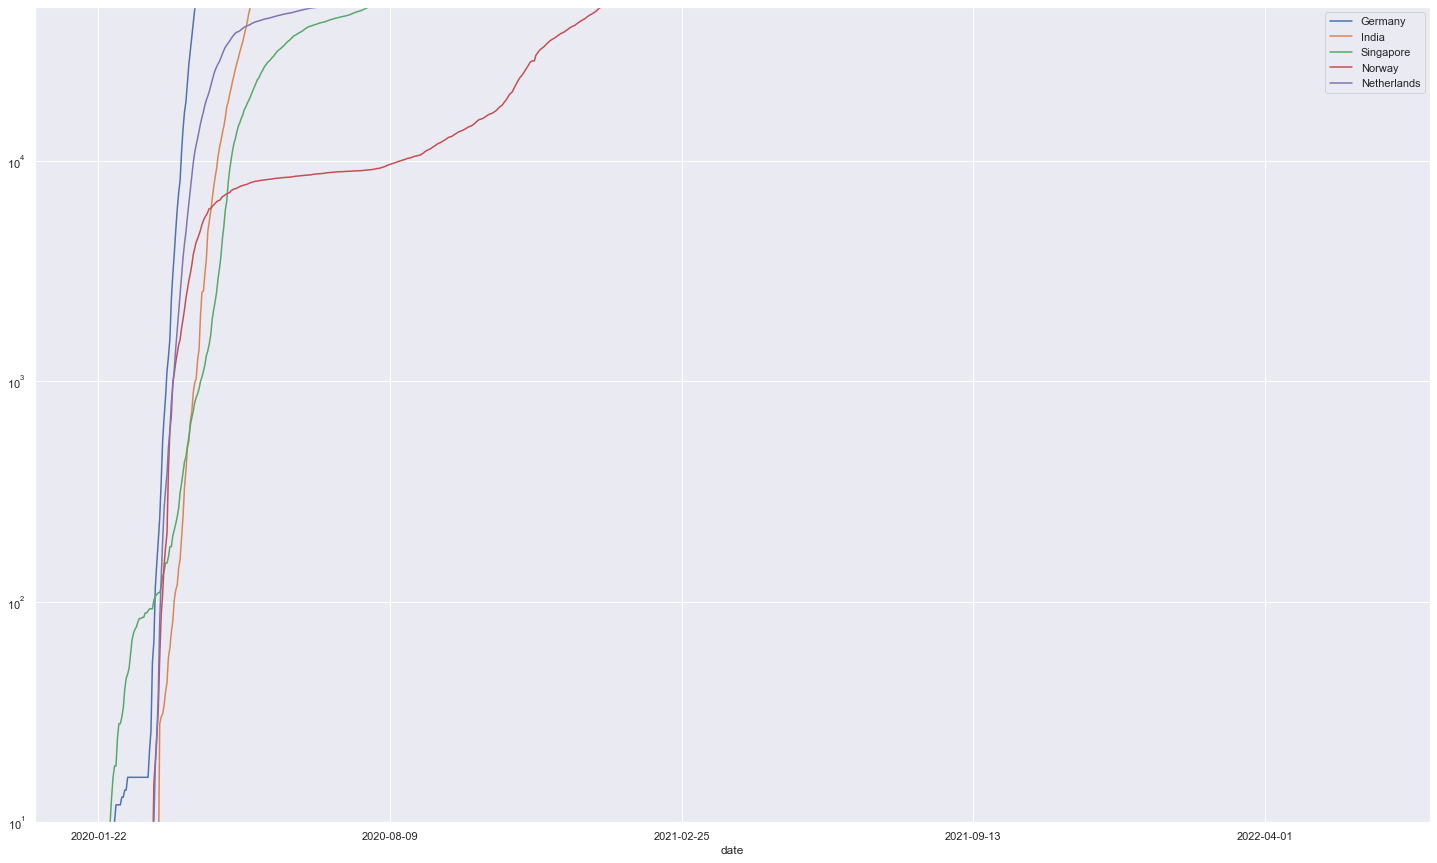

<Figure size 1800x1080 with 0 Axes>

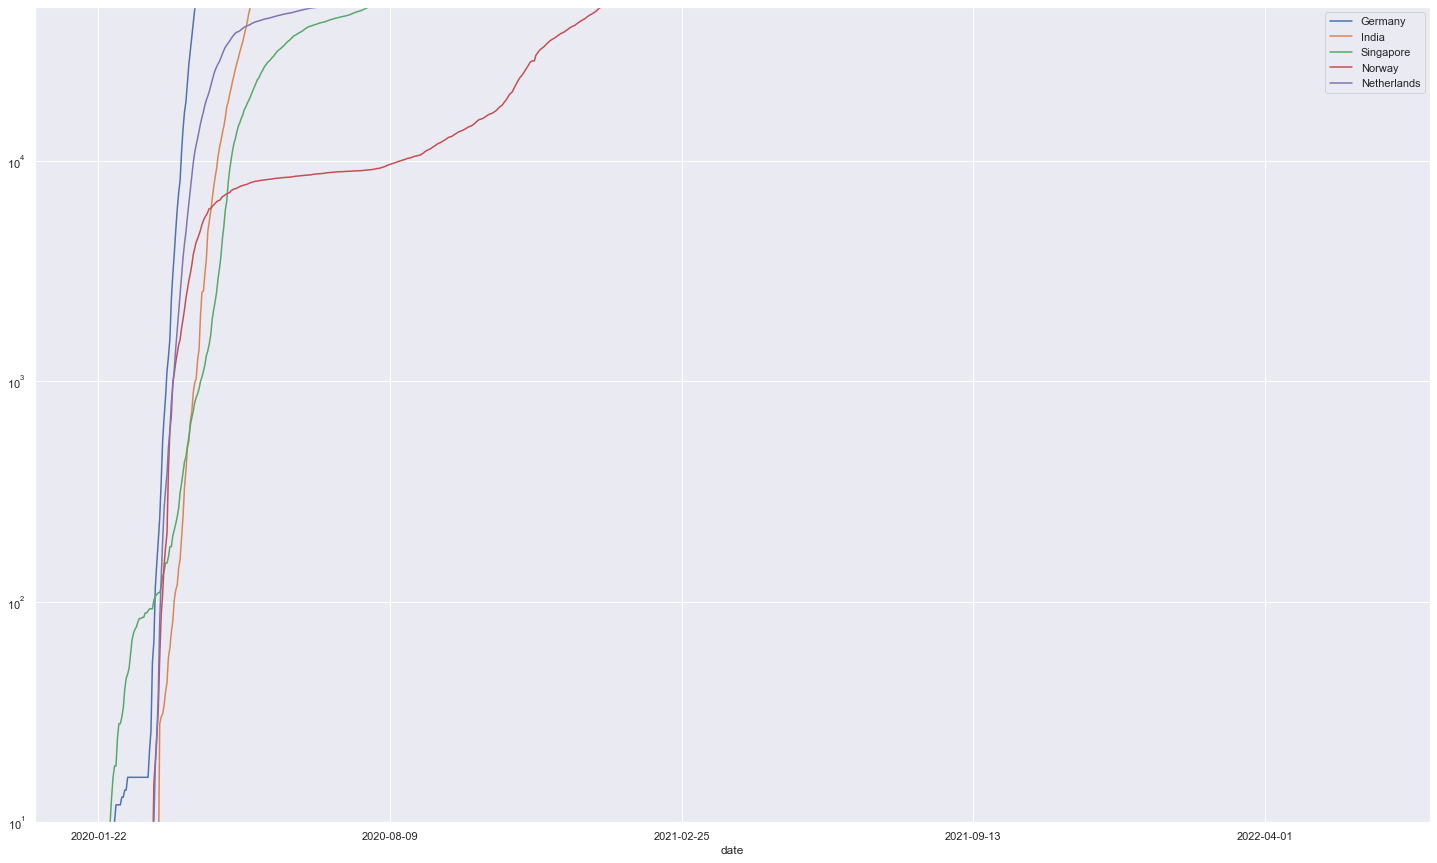

<Figure size 1800x1080 with 0 Axes>

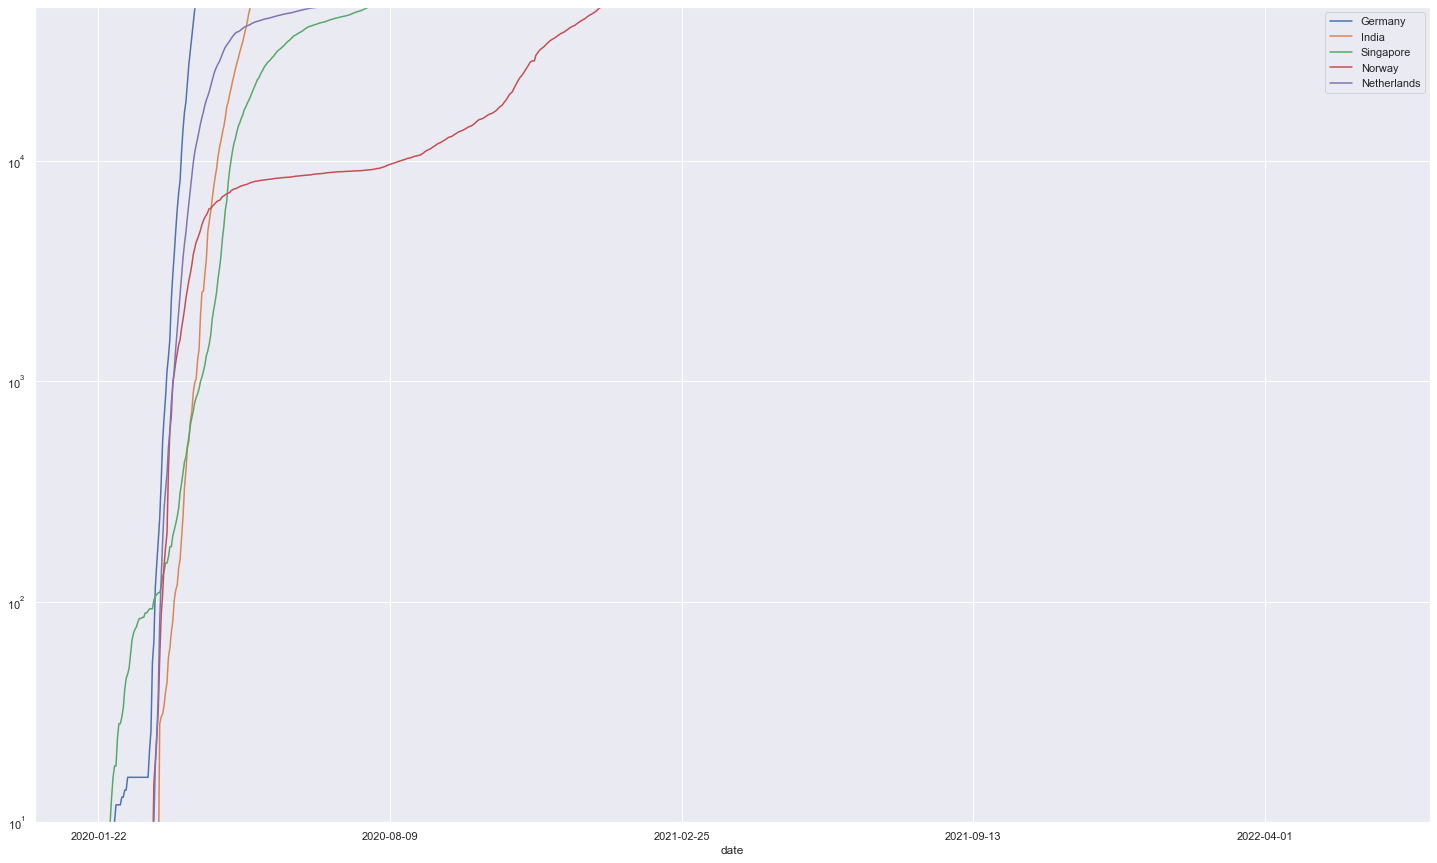

<Figure size 1800x1080 with 0 Axes>

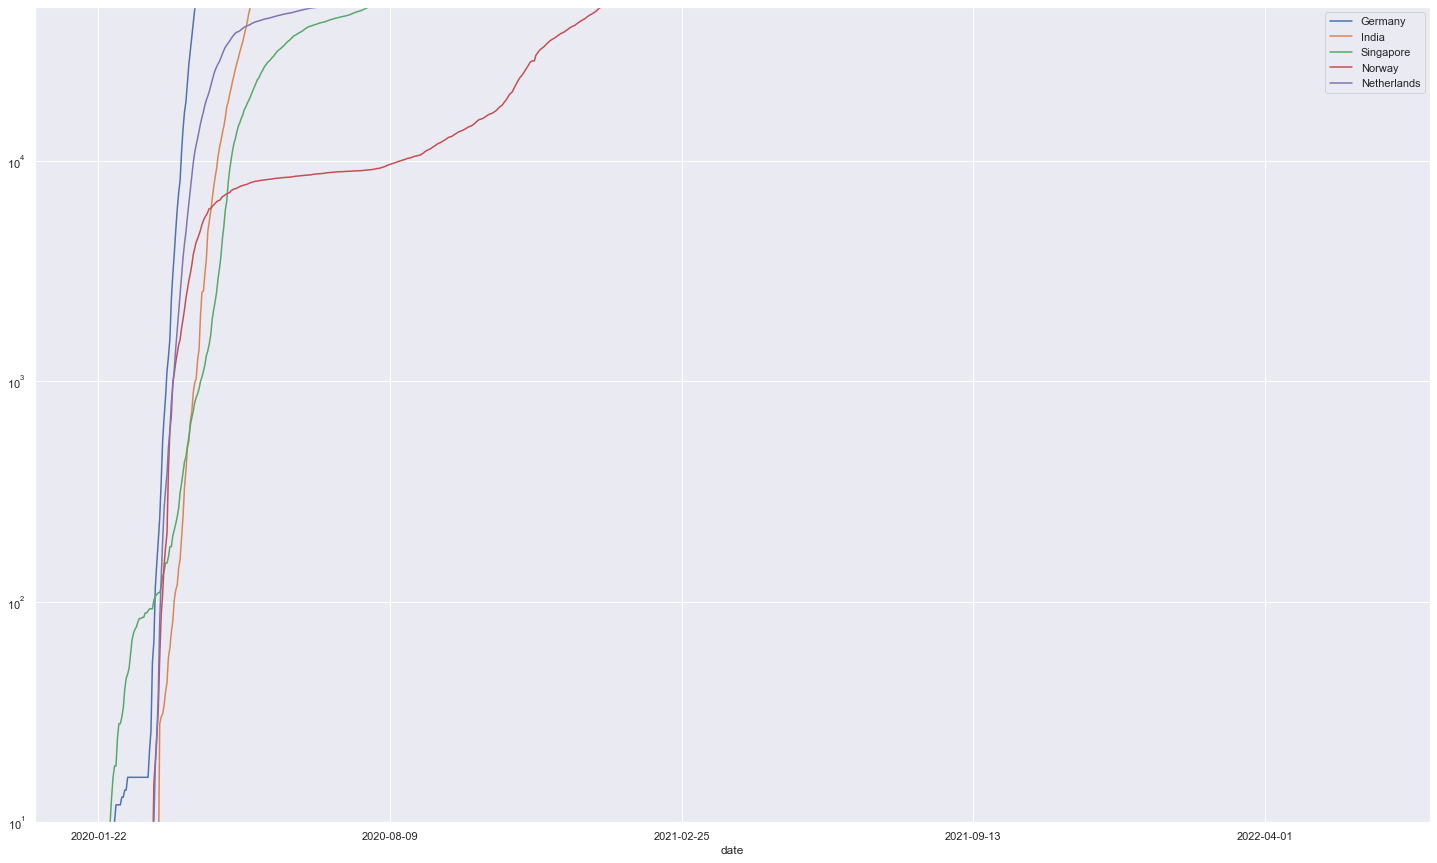

In [25]:
for each in country_list:
    plt.figure()
    axes = df_plot.set_index('date').plot()
    plt.ylim(10,50000)
    axes.set_yscale('log')

## Plotly

In [26]:
fig = go.Figure()
for each in country_list:
    fig.add_trace(go.Scatter(x = df_plot.date,
                            y = df_plot[each],
                            opacity = 0.9,
                            name=each))

#defines overall layout
fig.update_layout(
    #width=1600,
    #height=1200,
xaxis_title = "Time",
yaxis_title = "Confirmed cases")

fig.update_yaxes(type="log", range=[1.1,5.5])

fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='chrome')

## Dashboard

In [27]:
import dash
import dash_core_components as dcc
from dash import html

In [28]:
app = dash.Dash()
app.layout = html.Div([
    html.Label('Covid cases Graph - Multi-select Country'),
    dcc.Dropdown(
    id='country_drop_down',
    options = [
        {'label': 'Germany', 'value': 'Germany'},
        {'label': 'India', 'value': 'India'},
        {'label': 'Singapore', 'value': 'Singapore'},
        {'label': 'Norway', 'value': 'Norway'},
        {'label': 'Netherlands', 'value': 'Netherlands'}
    ],
        multi=True,
        value = ['Germany','India'],
    ),
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [29]:
from dash.dependencies import Input, Output


@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict(x = df_plot.date,
                            y = df_plot[each],
                            opacity = 0.9,
                            name=each))
    return {
        'data' : traces,
        'layout' : dict(
            width=1280,
            height=520,
            xaxis_title = "Time",
            yaxis_title = "Confirmed cases",
            xaxis={'tickangle':-45,
                   'nticks':20,
                   'tickfont':dict(size=14, color='#7f7f7f')
                  },
        yaxis={'type': "log",
              'range': '[1.1,5.5]'
              }
        )
    }

app.run_server(debug=True, use_reloader = False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
